In [43]:
import numpy as np

class SVM:

    def __init__(self, learning_rate=1e-3, lambda_parameter=1e-2, n_iters=1000):
        self.lr = learning_rate
        self.lp = lambda_parameter
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def _init_weights_bias(self, X):
        n_features = X.shape[1]
        self.w = np.zeros(n_features)
        self.b = 0

    def _get_cls_map(self, y):
        return np.where(y <= 0, -1, 1)

    def _satisfy_constraint(self, x, index):
        linear_model = np.dot(x, self.w) + self.b 
        return self.cls_map[index] * linear_model >= 1
    
    def _get_gradients(self, constrain, x, index):
        if constrain:
            dw = self.lp * self.w
            db = 0
            return dw, db
        dw = self.lp * self.w - np.dot(self.cls_map[index], x)
        db = - self.cls_map[index]
        return dw, db
    
    def _update_weights_bias(self, dw, db):
        self.w -= self.lr * dw
        self.b -= self.lr * db
    
    def fit(self, X, y):
        self._init_weights_bias(X)
        self.cls_map = self._get_cls_map(y)
        for _ in range(self.n_iters):
            for index, x in enumerate(X):
                constrain = self._satisfy_constraint(x, index)
                dw, db = self._get_gradients(constrain, x, index)
                self._update_weights_bias(dw, db)
    
    def predict(self, X):
        estimate = np.dot(X, self.w) + self.b
        prediction = np.sign(estimate)
        return np.where(prediction == -1, 0, 1)

[0 1 1 0 1 1 1 1 1 1 0 0 1 0 0 1 0 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 0 0 0 1 0
 0 0 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 1 1 0 0 1 0
 1 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 1 1 0 1 1 0 0 1 0 0]
SVM Accuracy:  1.0


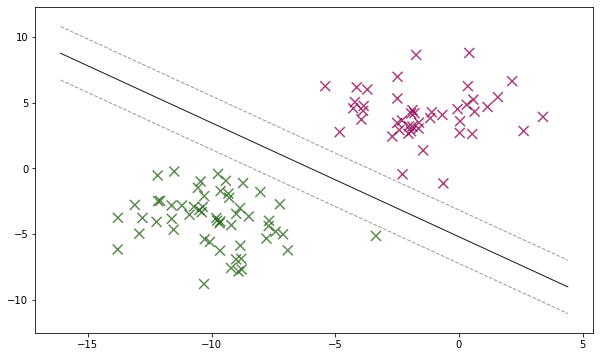

In [46]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X, y = datasets.make_blobs(
    n_samples=500, n_features=2, centers=2, cluster_std=2, random_state=1
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


clf = SVM(n_iters=1000)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true==y_pred) / len(y_true)
    return accuracy

print("SVM Accuracy: ", accuracy(y_test, predictions))

def get_hyperplane(x, w, b, offset):
    return (-w[0] * x - b + offset) / w[1]

fig, ax = plt.subplots(1, 1, figsize=(10,6))

plt.scatter(X_test[:, 0], X_test[:, 1], marker="x", c=y_test, s=100, alpha=0.75)

x0_1 = np.amin(X_train[:, 0])
x0_2 = np.amax(X_train[:, 0])

x1_1 = get_hyperplane(x0_1, clf.w, clf.b, 0)
x1_2 = get_hyperplane(x0_2, clf.w, clf.b, 0)

x1_1_m = get_hyperplane(x0_1, clf.w, clf.b, -1)
x1_2_m = get_hyperplane(x0_2, clf.w, clf.b, -1)

x1_1_p = get_hyperplane(x0_1, clf.w, clf.b, 1)
x1_2_p = get_hyperplane(x0_2, clf.w, clf.b, 1)

ax.plot([x0_1, x0_2], [x1_1, x1_2], "-", c='k', lw=1, alpha=0.9)
ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], "--", c='grey', lw=1, alpha=0.8)
ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], "--", c='grey', lw=1, alpha=0.8)

x1_min = np.amin(X[:, 1])
x1_max = np.amax(X[:, 1])
ax.set_ylim([x1_min - 3, x1_max + 3])
    
plt.show()